# Continuous distributions

In this notebook, $F(x)$ is the CDF and $F^\prime(x) = f(x)$ is the PDF.

## Uniform

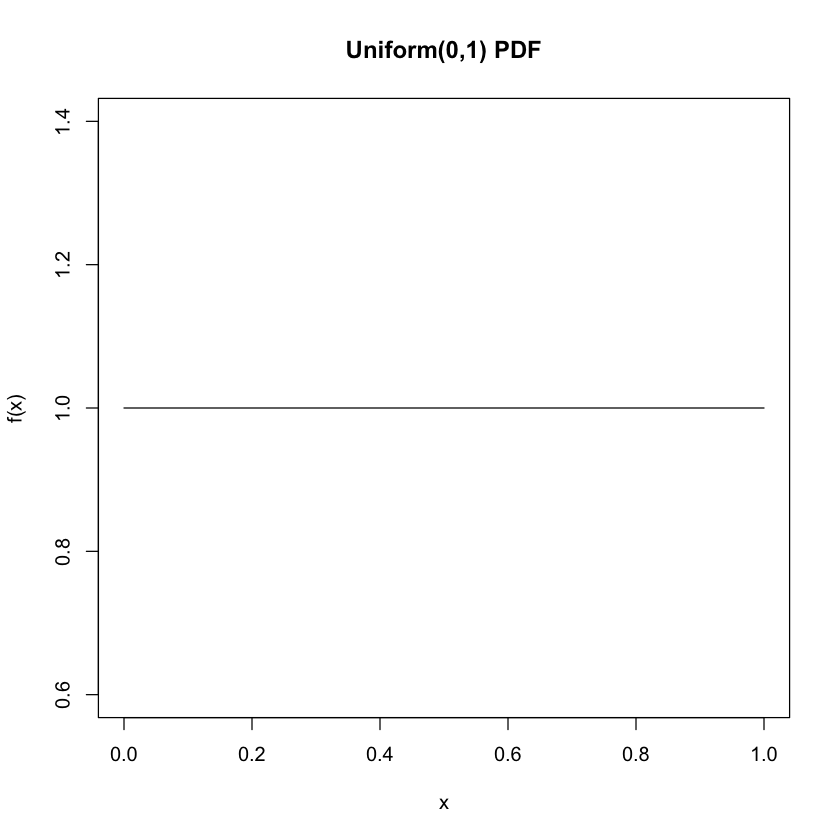

In [1]:
x <- seq(0, 1, length=100)

plot(x, dunif(x), type="l",
     main="Uniform(0,1) PDF", ylab="f(x)")

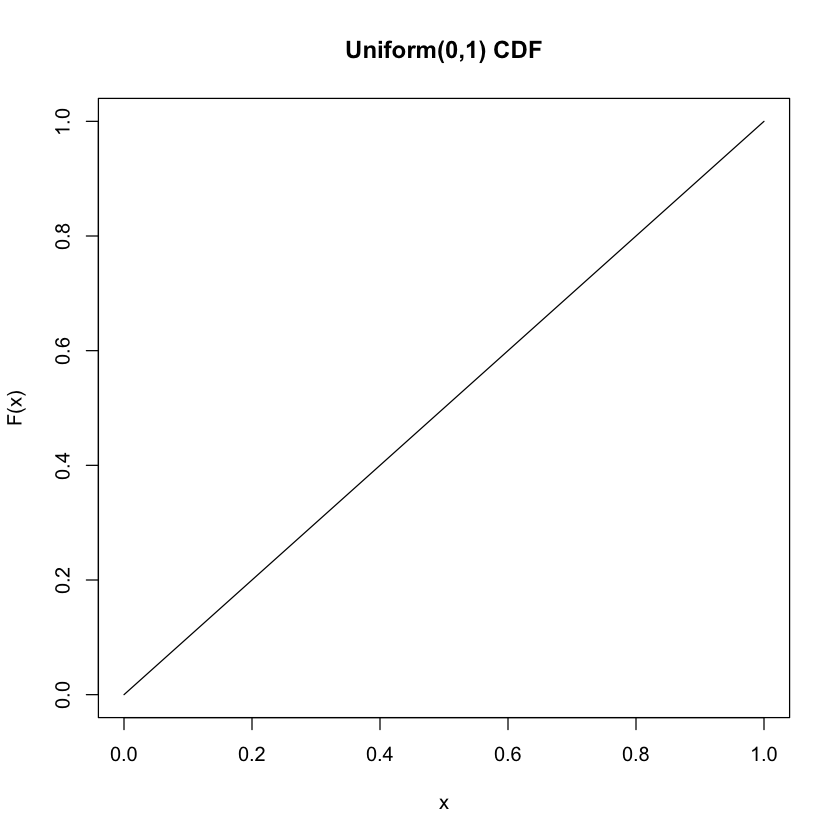

In [2]:
plot(x, punif(x), type="l",
     main="Uniform(0,1) CDF", ylab="F(x)")

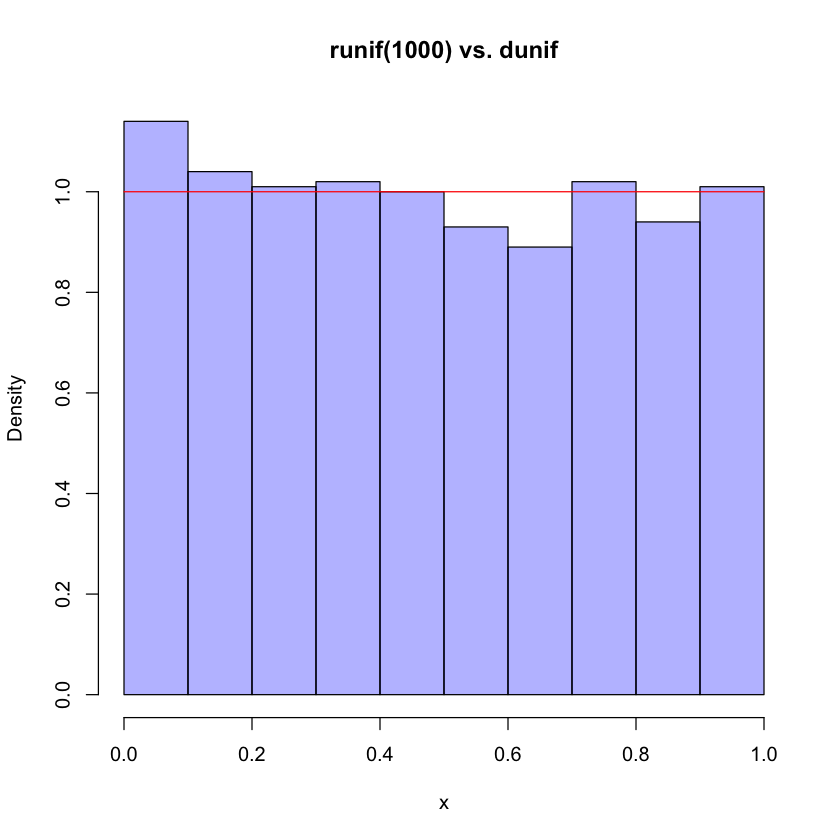

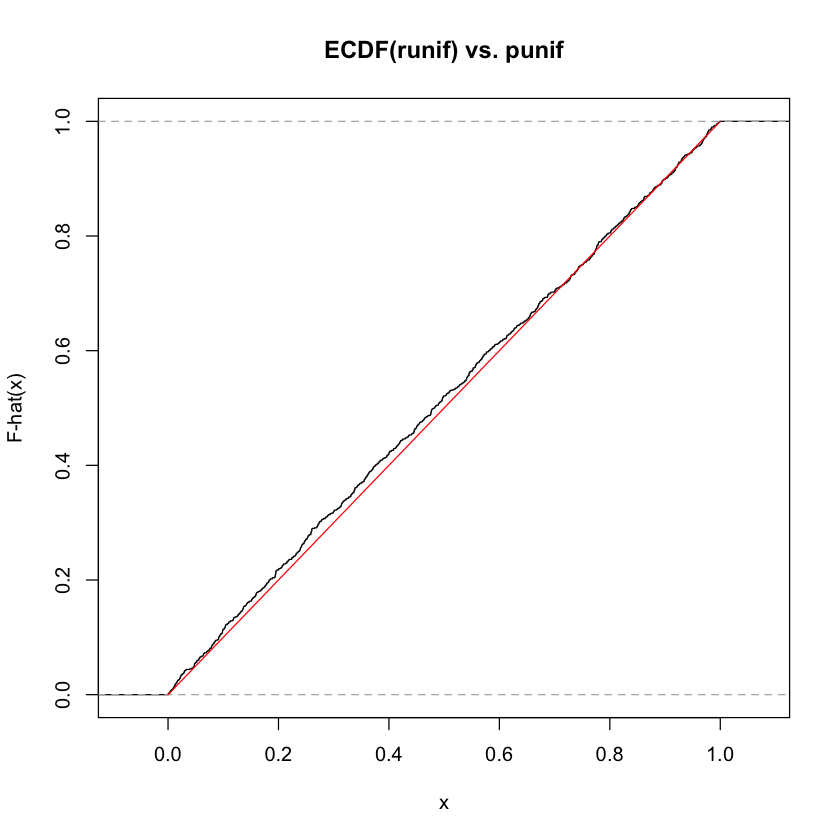

In [3]:
u <- runif(1000)
hist(u, probability=TRUE,
     main="runif(1000) vs. dunif",
     xlab="x", col=rgb(0,0,1,0.3))
lines(x, dunif(x), col="red")
plot(ecdf(u), main="ECDF(runif) vs. punif",
     xlab="x", ylab="F-hat(x)")
lines(x, punif(x), col="red")

## Normal

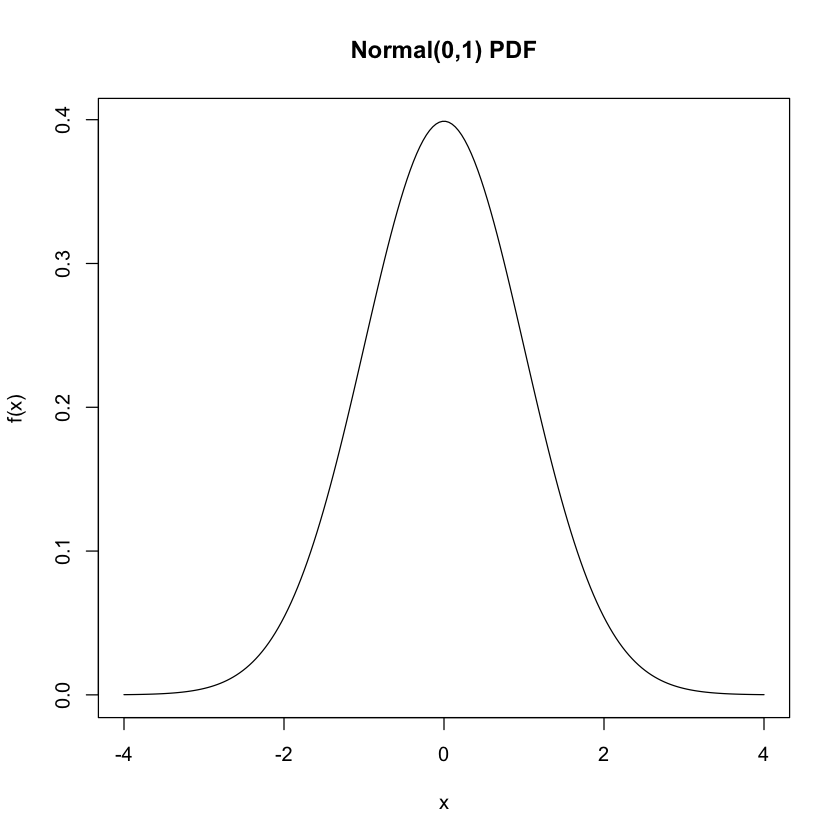

In [4]:
x <- seq(-4, 4, length=200)

plot(x, dnorm(x), type="l",
     main="Normal(0,1) PDF", ylab="f(x)")

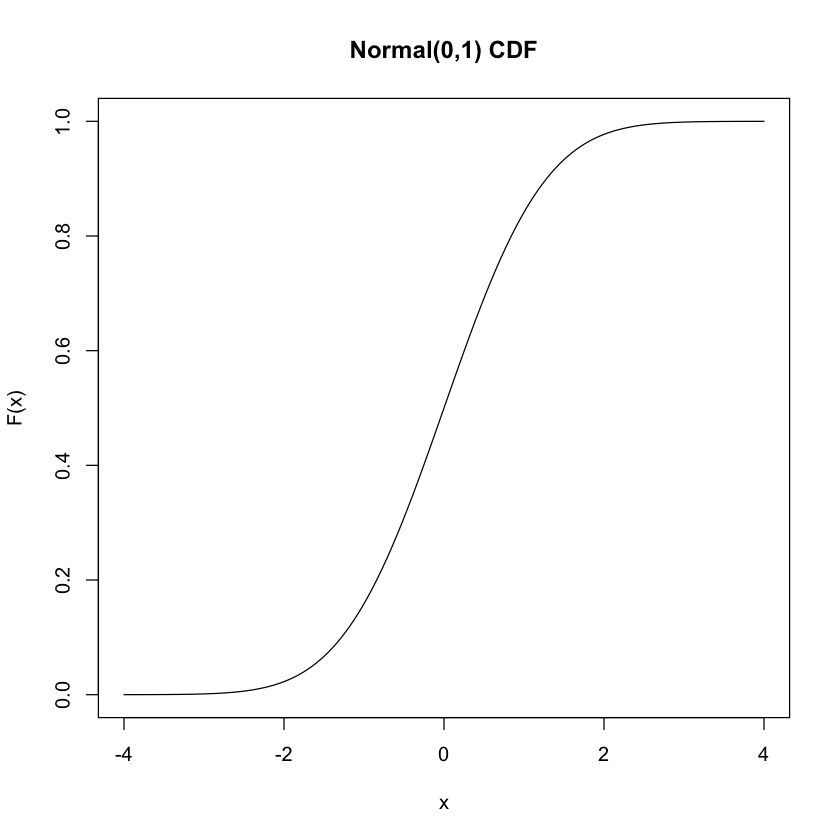

In [5]:
plot(x, pnorm(x), type="l",
     main="Normal(0,1) CDF", ylab="F(x)")

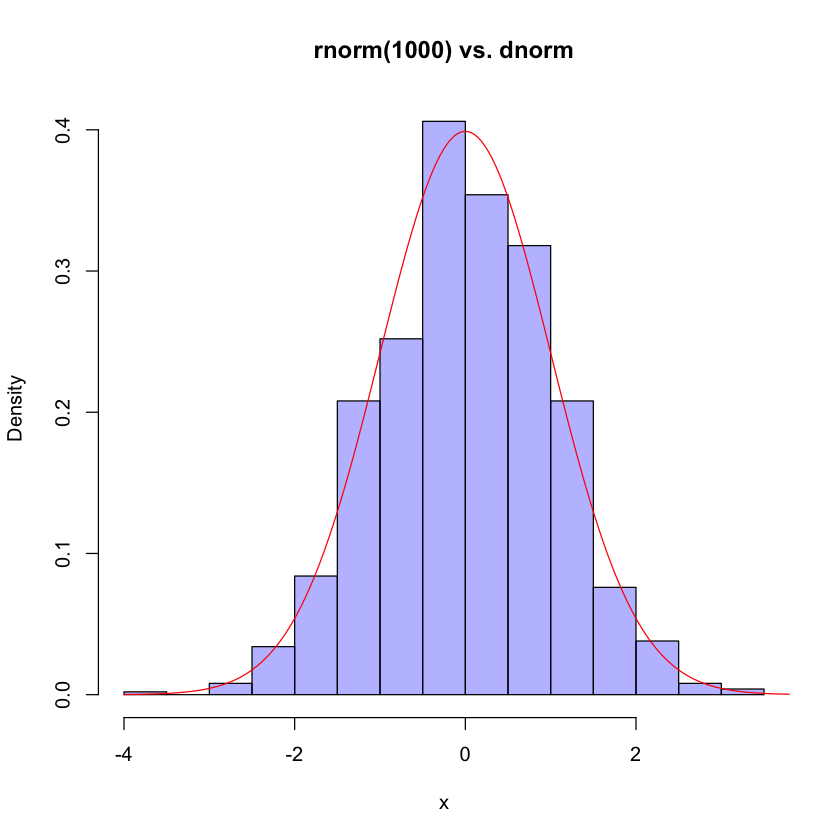

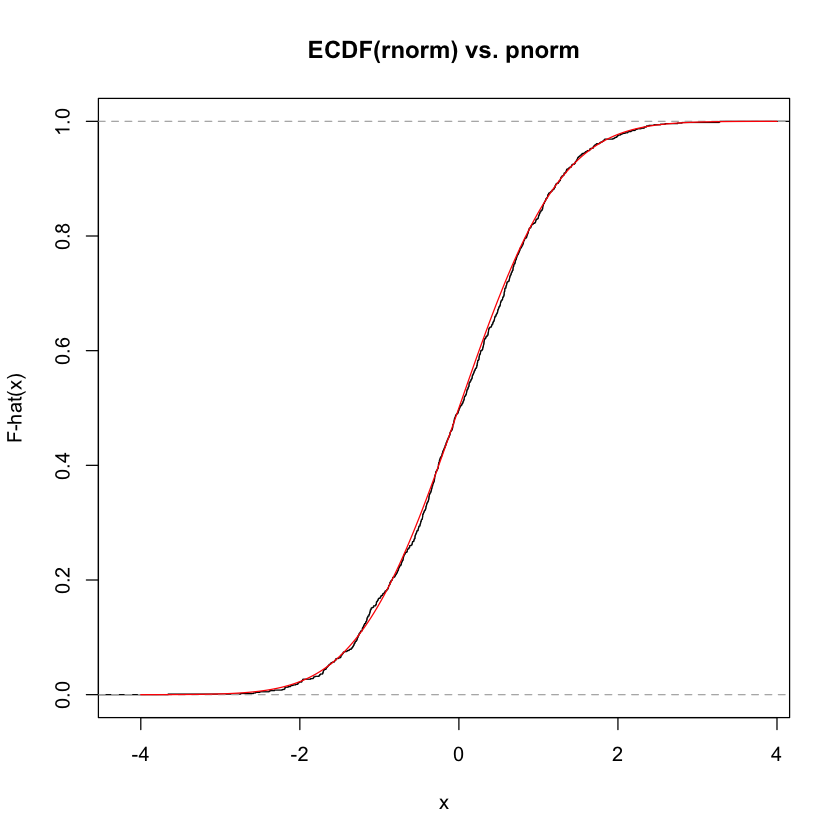

In [6]:
n <- rnorm(1000)
hist(n, probability=TRUE,
     main="rnorm(1000) vs. dnorm",
     xlab="x", col=rgb(0,0,1,0.3))
lines(x, dnorm(x), col="red")
plot(ecdf(n), main="ECDF(rnorm) vs. pnorm",
     xlab="x", ylab="F-hat(x)")
lines(x, pnorm(x), col="red")

## Exponential

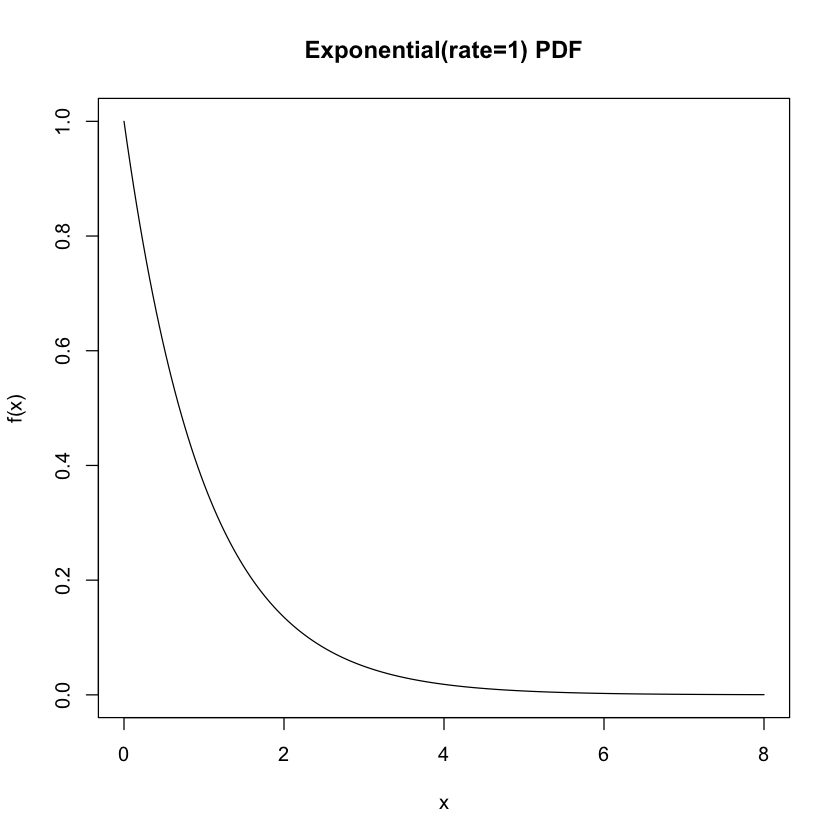

In [7]:
x <- seq(0, 8, length=200)

plot(x, dexp(x), type="l",
     main="Exponential(rate=1) PDF", ylab="f(x)")

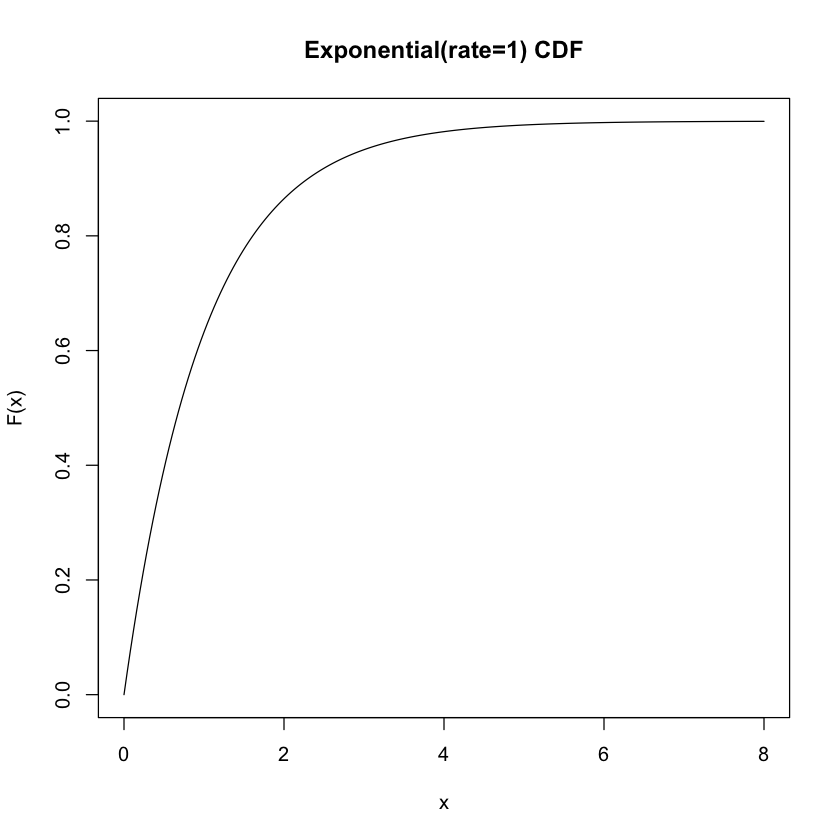

In [8]:
plot(x, pexp(x), type = "l",
     main = "Exponential(rate=1) CDF", ylab = "F(x)")

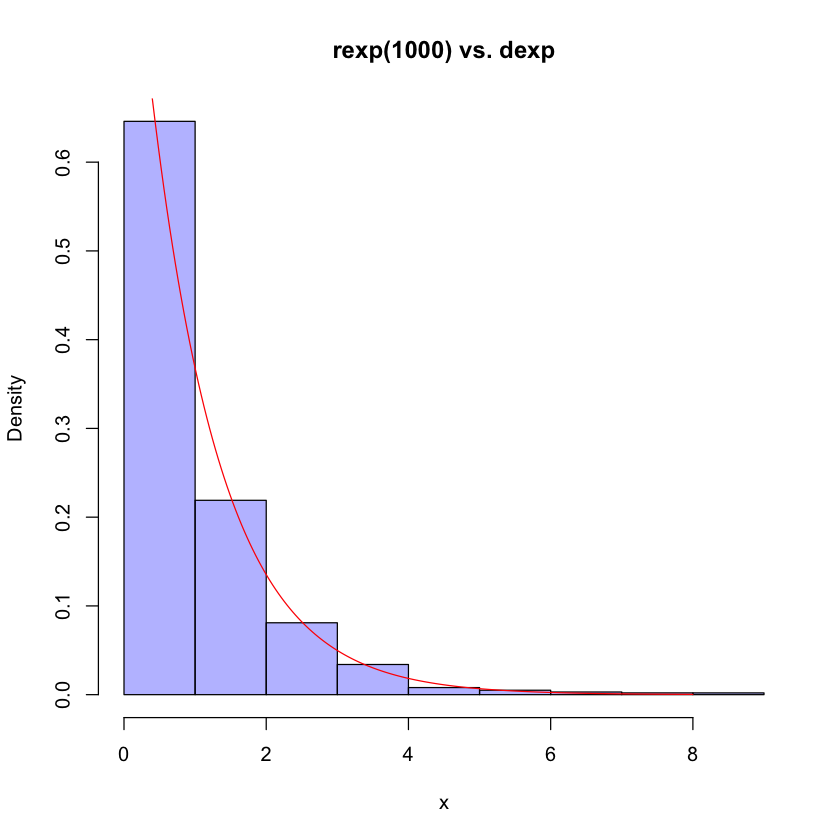

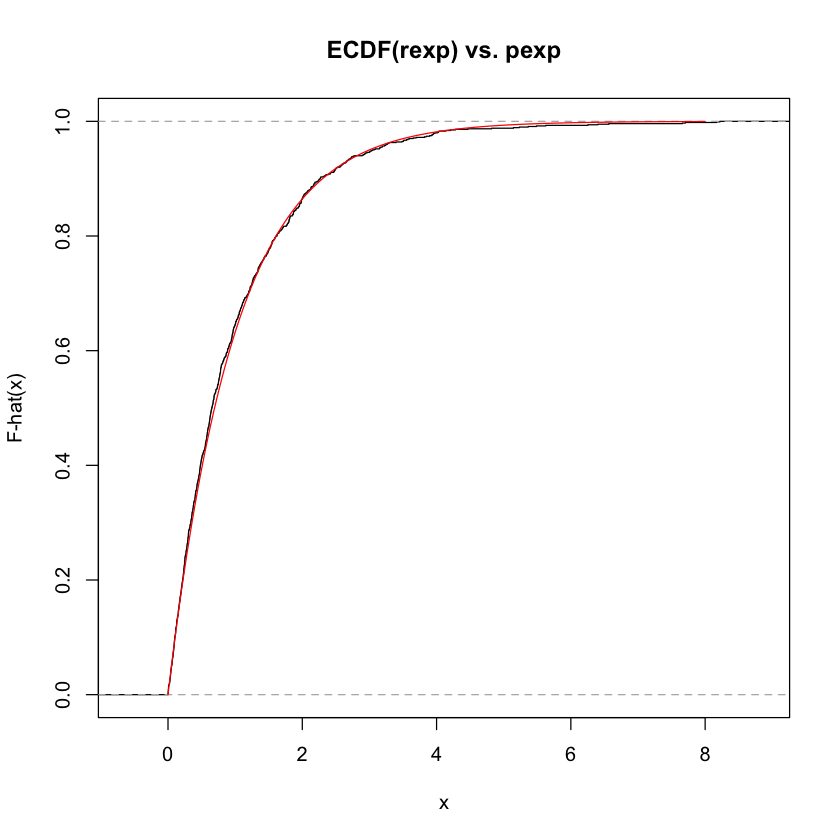

In [9]:
e <- rexp(1000, rate=1)
hist(e, probability=TRUE,
     main="rexp(1000) vs. dexp",
     xlab="x", col=rgb(0,0,1,0.3))
lines(x, dexp(x), col="red")
plot(ecdf(e), main="ECDF(rexp) vs. pexp",
     xlab="x", ylab="F-hat(x)")
lines(x, pexp(x), col="red")

## Universality of the Uniform

a.k.a. integral transform, inverse transform sampling, quantile transformation and fundamental theorem of simulation.

### From Uniform to Logistic

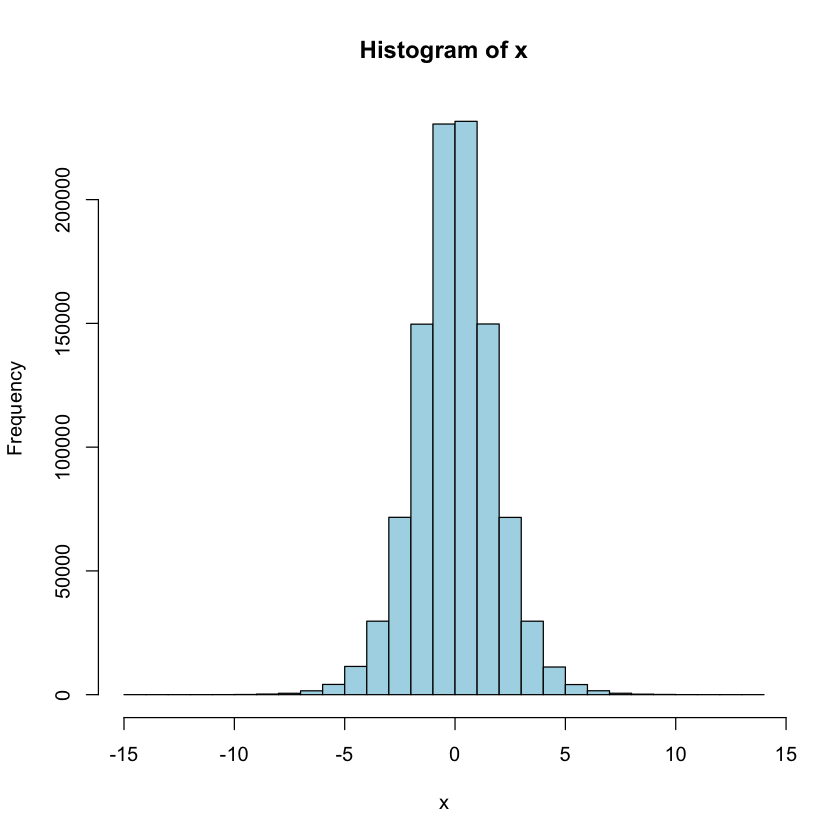

In [33]:
u <- runif(10^6)
x <- log(u/(1-u))
hist(x, col="lightblue",)

### From Uniform to Rayleigh

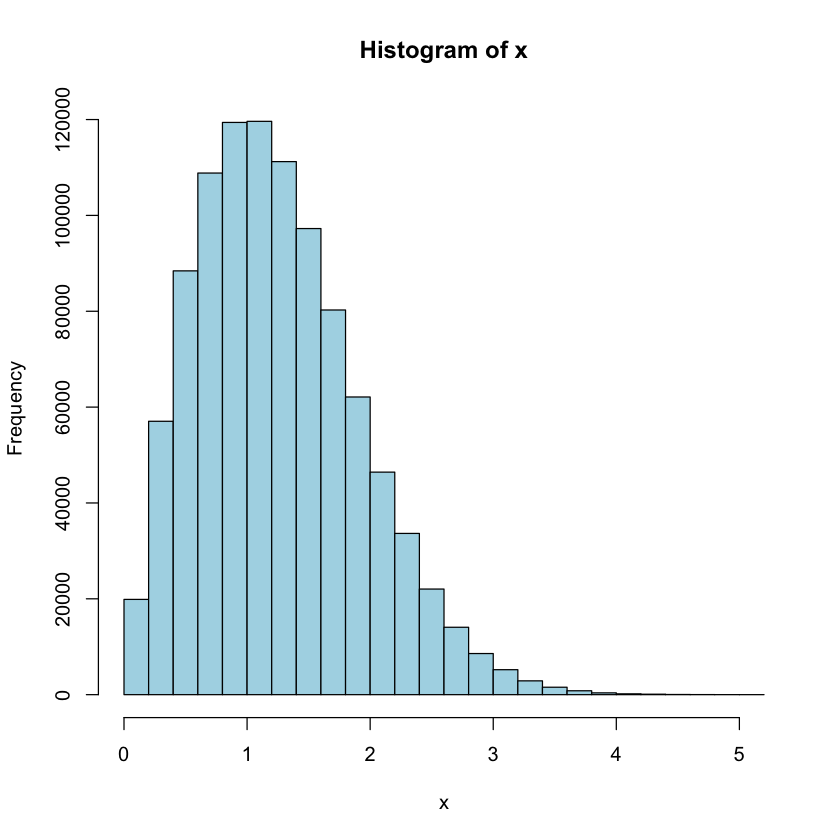

In [34]:
u <- runif(10^6)
x <- sqrt(-2*log(1-u))
hist(x, col="lightblue")

## Poisson process

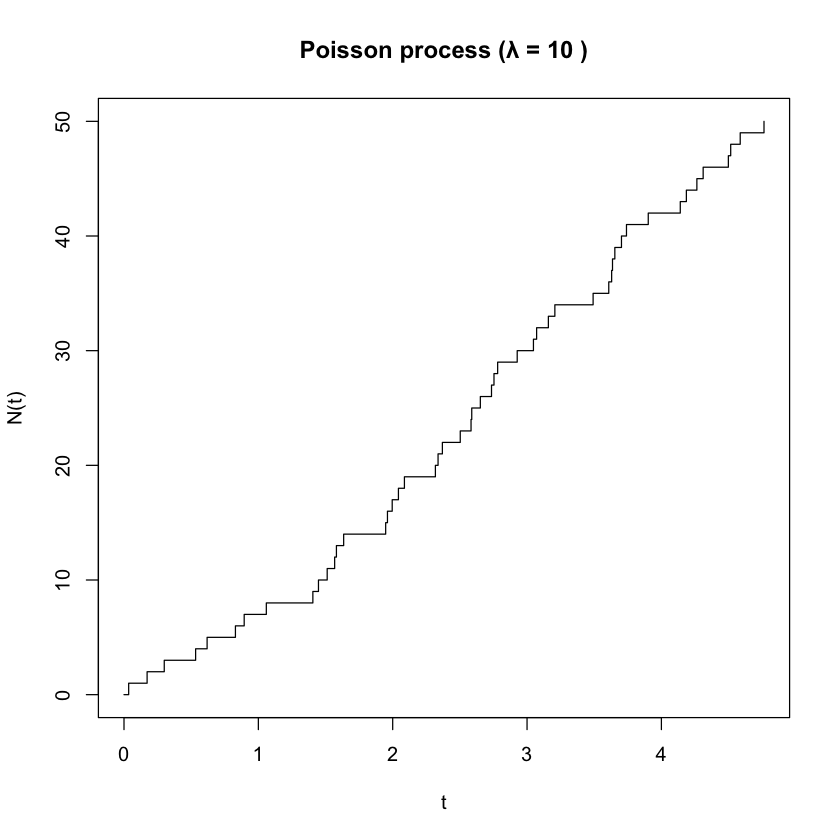

In [24]:
n <- 50
lambda <- 10
x <- rexp(n, lambda)
t <- cumsum(x)

plot(c(0, t), 0:length(t), type = "s",
     xlab = "t", ylab = "N(t)",
     main = paste("Poisson process (λ =", lambda, ")"))